In [1]:
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import cmocean

from pathlib import Path
from glob import glob

%matplotlib inline
plt.rcParams["font.size"] = 14

In [2]:
root_dir = '/home/gkara/Documents/for-tide_paper/'
bn2 = xr.open_mfdataset(root_dir + 'bn2_ref.nc', combine='by_coords')
bn2_ = xr.open_mfdataset(root_dir + 'bn2_exp1.nc', combine='by_coords')

In [18]:
bn2

<xarray.Dataset>
Dimensions:       (deptht: 50, time_counter: 360, x: 388, y: 538)
Coordinates:
  * deptht        (deptht) float32 0.50543666 1.5524175 ... 5274.782 5727.915
  * time_counter  (time_counter) datetime64[ns] 2011-07-06T12:00:00 ... 2012-06-29T12:00:00
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (y, x) float32 dask.array<chunksize=(538, 388), meta=np.ndarray>
    nav_lat       (y, x) float32 dask.array<chunksize=(538, 388), meta=np.ndarray>
    vobn2         (time_counter, deptht, y, x) float32 dask.array<chunksize=(360, 50, 538, 388), meta=np.ndarray>
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A
    history:           Partial step computation

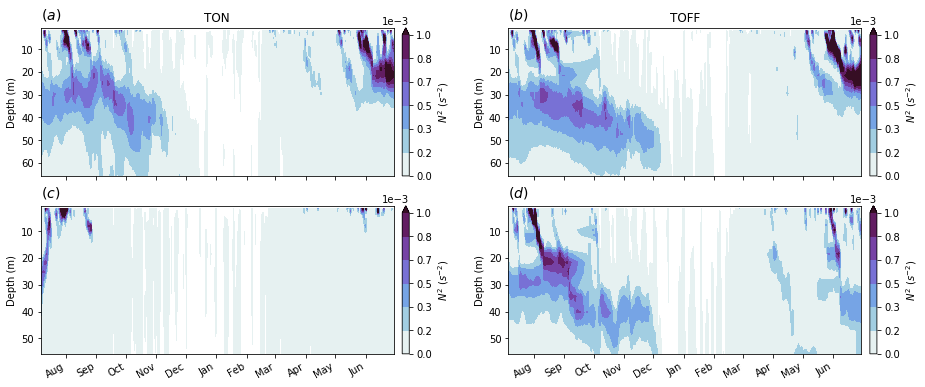

In [3]:
class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
             self.format = r'$\mathdefault{%s}$' % self.format

# armorican shelf 
armorican = bn2.isel(x=312,y=278,deptht=slice(0,20))
armorican_ = bn2_.isel(x=312,y=278,deptht=slice(0,20))

# english channel 
channel = bn2.isel(x=286,y=470,deptht=slice(0,19))
channel_ = bn2_.isel(x=286,y=470,deptht=slice(0,19))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,6))
plt.subplots_adjust(wspace=0.1)
cbar_kwargs = {"label":"$N^2$ ($s^{-2}$)", "pad": 0.02, "extend":"max", "format":OOMFormatter(-3, mathText=False)} #%.0e'}
vmin = 0
vmax = 0.001

## TON
armorican.vobn2.plot.contourf(ax=axes[0,0], x='time_counter', vmin=vmin, vmax=vmax, extend='max', cmap=cmocean.cm.dense, cbar_kwargs=cbar_kwargs)
channel.vobn2.plot.contourf(ax=axes[1,0], x='time_counter',vmin=vmin, vmax=vmax, extend='max', cmap=cmocean.cm.dense, cbar_kwargs=cbar_kwargs)

## TOFF
armorican_.vobn2.plot.contourf(ax=axes[0,1], x='time_counter', vmin=vmin, vmax=vmax, extend='max', cmap=cmocean.cm.dense, cbar_kwargs=cbar_kwargs)
channel_.vobn2.plot.contourf(ax=axes[1,1], x='time_counter',vmin=vmin, vmax=vmax, extend='max', cmap=cmocean.cm.dense, cbar_kwargs=cbar_kwargs)

# customize axis / add annpatation  
plot_numbers = ['$(a)$', '$(b)$', '$(c)$', '$(d)$']
axes[0,0].set_title('TON') ; axes[0,1].set_title('TOFF') 
axes[0,0].set_xticklabels(''); axes[0,1].set_xticklabels('')
idx = ['$(a)$', '$(b)$', '$(c)$', '$(d)$']
for i, ax in enumerate(axes.flat):
    ax.set_ylim(ax.get_ylim()[::-1]) # reverse                                  
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('')
    ax.annotate(idx[i], xy=(0, 1), xycoords='axes fraction', fontsize=14,
        xytext=(20, 5), textcoords='offset points',
        ha='right', va='bottom')
    
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%b')
axes[1,0].xaxis.set_major_formatter(myFmt)
axes[1,1].xaxis.set_major_formatter(myFmt)

#save figure
fig.savefig('../_plots/figure9.png',dpi=300,bbox_inches='tight')